<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Valeria Ladrón de Guevara Vidrio y Juan Pablo Rodriguez Alonso

**Fecha:** 21 de junio del 2021.

**Expediente** : if714513 y if715180.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/valerialadron/Tarea-6_VLadron_JPRodriguez

# Tarea 6: Clase 10

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

**Solución Valeria**

In [2]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

[1.875] [1.875]


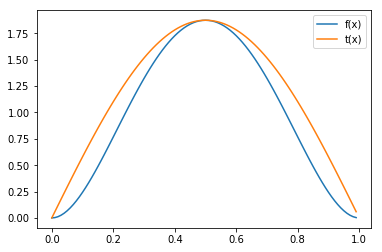

In [3]:
f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.sin(x*np.pi) 
max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))

x = np.arange(0,1,0.01) 
print(max_f,max_t)
# Gráficas 
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

**Código de solución estudiante 2 Juan Pablo Rodríguez**

El máximo de f es: [1.875]


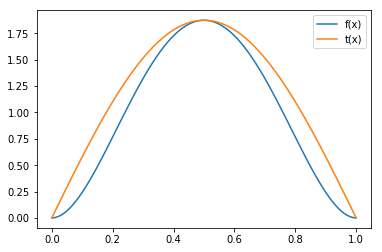

In [4]:
# Código de solución estudiante 2 Juan Pablo Rodríguez
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib notebook
%matplotlib inline


f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x: -f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.sin(np.pi*x)

x = np.arange(0,1.01,0.01)
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

**Conclusión Juan Pablo:** Se observa graficamente que en efecto, la condición $t(x)\geq f(x)$ se cumple, viendo que la función naranja $t(x)$ es mayor (pasa por encima) de la función $f(x)$.

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

**Solución Valeria**

$$a=0$$

$$b=1$$

$$g(x)=\frac{f(x)}{c}$$

$$c = \int_{-\infty}^{\infty} t(x) dx$$.

$$ c=\int_{a}^{b} t(x)  dx$$

$$ c=\int_{0}^{1} t(x)  dx$$

$$c= \int_{0}^{1} a \sin(\pi x) dx$$

$$c= \frac{2a}{\pi} $$

$$ g(x) = \frac{ \pi \sin(\pi x)}{2} $$

#### Código de solución estudiante 2 Juan Pablo Rodríguez

> Sabiendo que $t(x) = a\sin(\pi x)$. Entonces, por los límites que x está entre 0 y 1:
$$c= \int_{0}^{1} t(x) dx = \int_{0}^{1} a \sin(\pi x) dx$$
> Lo que da como resultado: $$ \int_{0}^{1}  a\sin(\pi x) dx  = \frac{2a}{\pi}$$
> Por lo que  $$ g(x) = \frac{t(x)}{c} = \frac{a\sin(\pi x)}{\frac{2a}{\pi}}$$
> Finalmente, tenemos como resultado que : $$g(x) = \frac{\pi}{2} \sin(\pi x)$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

**Solución Valeria**
$$G(x) = \int g(x)dx $$
 
 $$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$$

$$ u = \frac{1}{2}(- \cos(\pi x)+1) $$

$$ 2u = (- \cos(\pi x)+1) $$

$$ 2u-1 = - \cos(\pi x) $$

$$ \cos^{-1}(-2u+1) = \pi x$$

$$x= \frac{\cos^{-1}(-2u+1)}{\pi}$$

 **Código estudiante 2 Juan Pablo Rodríguez**
 >Tenemos que $$G(x) = \int_{0}^{1} \frac{\pi}{x} \sin(\pi x) = U$$
 > Resolviendo la integral tenemos que $$\frac{1-\cos(\pi x)}{2} = U$$
 >Despejando x $$x = \frac{\cos^{-1}(-2U +1)}{\pi}$$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.

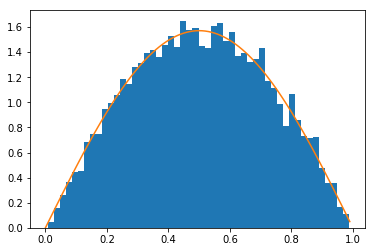

In [5]:
def dist(fx, inv, N):
    u = np.random.uniform(0,1,N)
    f_random = inv(u)
    x = np.arange(0,1,.01)
    fx = fx(x)
    plt.hist(f_random,bins=50,density = True)
    plt.plot(x,fx)
    plt.show()
N = 10000
g = lambda x: (np.pi / 2) * np.sin(np.pi * x)
g_inv = lambda u: (1 / np.pi) * np.arccos(-2 * u + 1)
dist(g,g_inv,N)

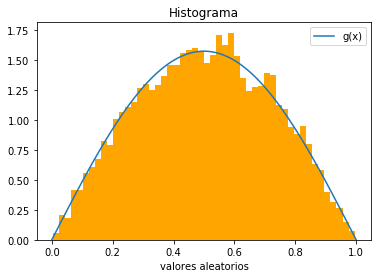

In [6]:
#codigo estudiante 2 Juan Pablo Rodríguez
def dist_g(N: "Numero a computar"):
    return (np.arccos(-2*np.random.random(N)+1))/np.pi
g_x = lambda x: (np.pi/2)*np.sin(np.pi*x)
# Número de muestras
N = 10000 

# creamos muestras exponenciales con la función creada
gn = dist_g(N)

# Graficamos el histograma para x
plt.hist(gn,50,color="orange",density=True)
plt.plot(x,g_x(x),label='g(x)')
plt.xlabel('valores aleatorios')
plt.title('Histograma')
plt.legend()
plt.show()

**Conclusión Juan Pablo:** Se observa como los puntos generados aleatoriamente, se encuentran distribuídos con la forma de la función g(x), estando en su mayoría por debajo de la función mencionada. 

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

**Solución Valeria**

In [7]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    q = 0
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]                

El máximo de f es: [1.875]


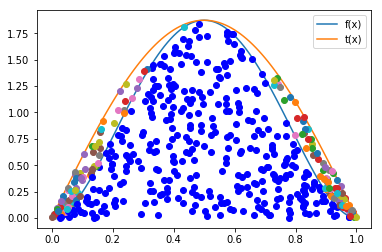

In [8]:
x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N) 

quantity_sin = Acep_rechazo(R2,R1,f,t)

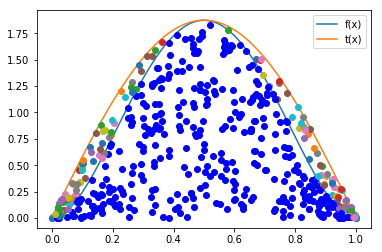

In [9]:
#codigo estudiante 2 Juan Pablo Rodríguez

# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
# Función t -> Función constante
t = lambda x: max_f * np.sin(np.pi*x)
x = np.arange(0,1.01,0.01)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()   
R2 = np.random.rand(500)
R1 = np.random.rand(500)
Acep_rechazo(R2, R1, f, t)

**Conclusión Juan Pablo:** Se valida que los cálculos anteriormente realizados están correctos, gráficamente se ven en azul los puntos dentro de $f(x)$ y en colores varios los que están fuera de $f(x)$ pero dentro de $t(x)$.

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

**Solución Valeria**

In [11]:
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    cont = np.zeros(len(R1))
    condition = R2*t_x <=f_x
    def a(i):
        nonlocal cont
        cont [i] = True if condition[i] else False 
    [a(i) for i in range(len(R1))]

    return cont

f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t1= lambda x: max_f*np.sin(x*np.pi) 
t2= lambda x: max_f*np.ones(len(x))  
x = np.arange(0,1,0.01)  

# Validación del método
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)


print('Entonces:')
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de', sum(Acep_rechazo2(R2,R1,f,t1))/N)
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal es de ', sum(Acep_rechazo2(R2,R1,f,t2))/N)

Entonces:
El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de 0.678
El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal es de  0.496


In [10]:
#Código de solución estudiante 2 Juan Pablo Rodríguez
def Acep_rechazo3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    rnd = [R1[i] for i in range(len(R1)) if condition[i]]
                
    return rnd
x = np.arange(0,1.01,0.01)
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
max_f = f(optimize.fmin(lambda x: -f(x), 0, disp=False))
# Función t -> Función constante
t_cons = lambda x: max_f * np.ones(len(x))
t_sin = lambda x: max_f*np.sin(x*np.pi) 
R2 = np.random.rand(500)
R1 = np.random.rand(500)
a_rcons = Acep_rechazo3(R2, R1, f, t_cons)
a_rsin = Acep_rechazo3(R2, R1, f, t_sin)
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de', len(a_rcons)/500)
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal es de ',len(a_rsin)/500)

El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de 0.548
El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal es de  0.704


**Conclusiones Juan Pablo:** Es claro que va a tener más porcentaje de acertación una función senoidal, ya que abarca un área más cercana o parecida a la función a estudiar, en este caso $30(x^2 - 2x^3 + x^4)$

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

**Solución Valeria**

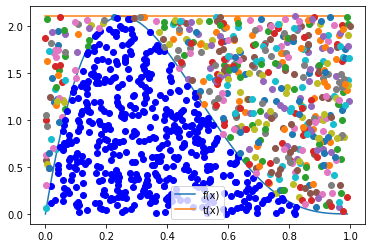

In [11]:
f = lambda x:20*x*(1-x)**3
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.ones(len(x)) 

x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1000 
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

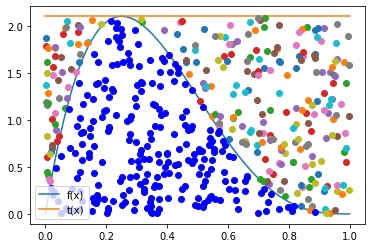

In [12]:
#Código de solución estudiante 2 Juan Pablo Rodríguez
x = np.arange(0,1.01,0.01)
f = lambda x: 20*x*(1-x)**3
max_F = f(optimize.fmin(lambda x: -f(x), 0, disp=False))
t = lambda x: max_F * np.ones(len(x))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()   
R2 = np.random.rand(500)
R1 = np.random.rand(500)
Variable_aleatoria = Acep_rechazo(R2, R1, f, t)

**Conclusión Juan Pablo:** Se observa como la variable aleatoria a través del método de aceptación y rechazo, se encuentra con los puntos azules, en este caso generé 500 puntos aleatorios que encajan en la ecuación dada.

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

**Solución Valeria**
$$ p_i+1=\frac{n!}{(i+1)!(n-(i+1))!}p^(i+1)(1-p)^{n-(i+1)}$$

$$ p_i+1=\frac{n!}{(i+1)(i)!(i+1)(n-i)!}p^(i+1)(1-p)^{n-(i+1)}$$

 $$p_{i+1}=\frac{n-i}{(1+i)}P \frac {p_i}{1-p}$$

**Código solución estudiante 2 Juan Pablo Rodríguez**
 $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$


Recorro de $i$ a $i + 1$ $$p_{i+1}  = \frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)}$$ 

>Eliminando factoriales don la propiedad de división entre el término previo:

$$ \frac{\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)}}{\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}} = \frac {(n-i)p}{(1+i)(1-p)}p_i $$
 
> Por lo que ya tenemos:
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

Demuestre matemáticamente que 
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$
y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

**Solución Valeria**
$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}\lambda^{k+1} k!}{(k+1)!e^{-\lambda}\lambda^k}$$

$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}\lambda^{k+1} 1}{e^{-\lambda}\lambda^k ( k + 1)}$$


$$\frac{P(k+1)}{P(k)} = \frac{\lambda^{k+1} 1}{\lambda^k ( k + 1)}$$

$$\frac{P(k+1)}{P(k)} = \frac{\lambda}{( k + 1)}$$

$$P(k+1) = \frac{\lambda P(k)}{( k + 1)}$$

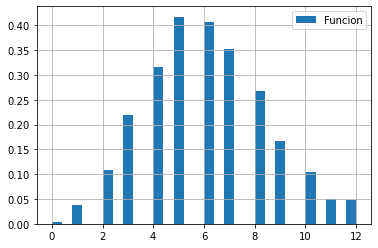

In [13]:
def Poisson(k,l):
    global pr
    pr = np.zeros(k)
    pr[0] = np.exp(-l)
    def Pr(i):
        global pr
        pr[i+1]=l/(i+1)*pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [Pr(i) for i in range(k-1)]
    return np.cumsum(pr)
N = 10000; n = 12; l = 6
u = np.random.rand(N)
p_acum = Poisson(n,l)

dist = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(N)))
plt.figure(figsize = [6,4])
plt.hist(dist, 30, density=True, label='Funcion')
plt.grid()
plt.legend()

**Código de solución estudiante 2 Juan Pablo Rodríguez Alonso:**

Conociendo esta ecuación: $$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

Si lambda es constante tenemos $$P(k)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

Teniendo $$\frac{P(k+1)}{P(k)}=\frac{\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}}{\frac{e^{-\lambda}(\lambda)^k}{k!}} $$ 

Tenemos entonces: $$P(k+1)=\frac{e^{-\lambda}\lambda^k\lambda}{(k+1)k!} $$

Por lo que: $$P(k+1)=\frac{\lambda}{k+1}P(k)$$

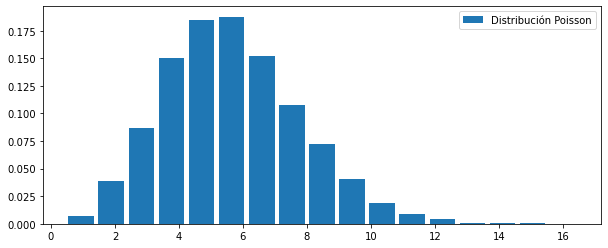

In [14]:
#codigo de solución estudiante 2 Juan Pablo Rodríguez
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

def P_Poisson(l: 'variable lambda',k: 'variable k'):
    Pr = np.zeros(k+1)
    Pr[0] = np.exp(-l)
    def pr(i):
        nonlocal Pr
        Pr[i+1]=(l/(i+1))*Pr[i]
    [pr(i) for i in range(k)]
    return np.cumsum(Pr)
lam, k = 5, 20
poisson = P_Poisson(lam,k)
N = 10000
dist = Gen_distr_discreta(poisson,np.arange(0, k+1),N)
plot_histogram_discrete(dist,'Distribución Poisson')